In [70]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from src.features.conferences import ConferenceFeatures
from src.features.coaches import CoachFeatures
from src.features.seeds import SeedFeatures
from src.utils import load_data_template
from src.features.games_detailed import GameDetailedFeatures
from src.features.games import GameFeatures
from src.features.rankings import RankingFeatures
from src.features.events import EventFeatures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
data = load_data_template(season=False)
data.dropna(subset=['a_win'], inplace=True)
seed_feat = SeedFeatures()
data = seed_feat.per_team_wrapper(data, seed_feat.team_seeds, per_game=False, per_day=False, combine='subtract')
print('-- Seeds loaded --')
print(data.shape)
coach_feat = CoachFeatures(default_lags=0)
data = coach_feat.per_team_wrapper(data, coach_feat.coach_func, per_game=False, per_day=False)
data = data.fillna(0)
print('-- Coach loaded --')
print(data.shape)
conf_feat = ConferenceFeatures(default_lags=0)
data = conf_feat.per_team_wrapper(data, conf_feat.conference_games, per_game=False, per_day=False)
data = data.fillna(0)
print('-- Conferences loaded --')
event_feat = EventFeatures(default_lags=1)
data = event_feat.per_team_wrapper(data, event_feat.steals_in_season)
data = data.fillna(0)
print('-- Events loaded --')
game_feat = GameFeatures()
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_season)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_tourney)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_against_opponent, per_game=True)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney_against_opponent, per_game=True)
data = data.fillna(0)
print(data.shape)
print('-- Game Features loaded --')
game_detail_feat = GameDetailedFeatures(default_lags=2)
data = game_detail_feat.per_team_wrapper(data, game_detail_feat.detail_features_by_game, per_day=True)
data = data.fillna(0)
print(data.shape)
print('-- Game Detailed Features loaded --')
rank_feat = RankingFeatures(default_lags=0)
data = rank_feat.per_team_wrapper(data, rank_feat.pca_variables_rankings, per_game=False, per_day=False)
print(data.shape)
data = data.fillna(0)
data = rank_feat.per_team_wrapper(data, rank_feat.elos_season, per_game=False, per_day=False)
print('-- Rankings loaded --')
data = data.fillna(0)
print(data.shape)
data.sample()

-- Seeds loaded --
(2117, 8)
               coach_team_a
TeamID Season              
1102   1985            1064
1103   1985             105
1104   1985            1377
1106   1985             529
1108   1985             292
1109   1985             430
1110   1985             386
1111   1985             749
1112   1985             831
1113   1985             122
1114   1985             939
1116   1985             394
1117   1985             972
1119   1985             816
1120   1985            1204
1121   1985             867
1122   1985             504
1123   1985               5
1124   1985             619
1126   1985             238
1129   1985             129
1130   1985             440
1131   1985             693
1132   1985             715
1133   1985             336
1134   1985             853
1135   1985             912
1137   1985             194
1139   1985             670
1140   1985             778
1141   1985             334
1143   1985             332
1144   1985        

-- Events loaded --
(2146, 40)
-- Game Features loaded --
(2146, 92)
-- Game Detailed Features loaded --
(2146, 132)
-- Rankings loaded --
(2146, 134)


,Season,team_a,team_b,in_target,game_set,a_win,DayNum,seed_combined,coach_team_a,coach_team_b,...,PC13_team_b,PC14_team_b,PC15_team_b,PC16_team_b,PC17_team_b,PC18_team_b,PC19_team_b,PC20_team_b,elos_season_team_a,elos_season_team_b
10074,2000,1163,1429,False,0,True,137,-7,608,1245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973.727188,1708.030233


In [87]:
data.describe()

,Season,game_set,DayNum,seed_combined,coach_team_a,coach_team_b,conference_team_a,conference_team_b,steals_in_season_team_a_lag-1,steals_in_season_team_b_lag-1,...,PC13_team_b,PC14_team_b,PC15_team_b,PC16_team_b,PC17_team_b,PC18_team_b,PC19_team_b,PC20_team_b,elos_season_team_a,elos_season_team_b
count,2146.000000,2146.0,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.0,2146.0,...,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,2001.181733,0.0,139.195247,-0.086673,706.614632,695.214818,21.399348,20.170550,0.0,0.0,...,-0.730181,1.798017,-0.089320,1.386463,-4.446493,-1.036441,3.163020,0.929488,1811.711620,1801.101102
std,9.548920,0.0,4.262439,7.527227,397.036322,399.112663,16.202057,16.204054,0.0,0.0,...,30.089592,26.003023,23.376596,23.684055,15.564928,13.860321,12.326219,9.755630,163.699359,153.092972
min,1985.000000,0.0,134.000000,-15.000000,5.000000,8.000000,0.000000,0.000000,0.0,0.0,...,-354.326220,-223.095264,-218.446986,-127.547339,-110.892774,-66.387530,-77.954503,-79.045459,1278.346756,1164.517634
25%,1993.000000,0.0,136.000000,-5.000000,345.250000,351.000000,7.000000,7.000000,0.0,0.0,...,-1.573020,0.000000,-0.173880,0.000000,-13.501817,-5.286710,0.000000,0.000000,1710.212718,1708.544204
50%,2001.000000,0.0,137.000000,0.000000,763.000000,682.000000,13.000000,12.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1824.072929,1819.645339
75%,2010.000000,0.0,139.000000,5.000000,1007.500000,1082.000000,38.000000,38.000000,0.0,0.0,...,0.000000,4.051373,0.000000,0.000000,0.000000,0.000000,3.677852,3.482983,1930.292962,1908.690941
max,2017.000000,0.0,154.000000,15.000000,1377.000000,1369.000000,50.000000,50.000000,0.0,0.0,...,408.587952,273.292071,201.515760,242.059108,118.824938,104.631226,110.545465,50.751706,2199.686737,2184.448036


# XGBoost 
## Metric Mean: 0.25 (0.03)

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss


X = data.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target', 'DayNum'], axis=1)
y = data[['a_win']].astype(int)

kf = KFold(n_splits=15, shuffle=True)
metrics = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i]
    X_t, y_t = X.iloc[t_i], y.iloc[t_i]
    xgb = XGBClassifier(n_estimators=100)
    xgb.fit(X_tr.values, y_tr.values.reshape(-1))
    preds = xgb.predict_proba(X_t.values)
    metric = log_loss(y_t.values, preds)
    print(metric)
    metrics.append(metric)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))

0.215270962814
0.245225434636
0.253693165526
0.216829157424
0.233806403034
0.237808018202
0.291970913816
0.29584561899
0.259727409406
0.197606993262
0.262690817013
0.289690352244
0.255648297196
0.218788714329
0.213267561718
Metric Mean: 0.25 (0.03)


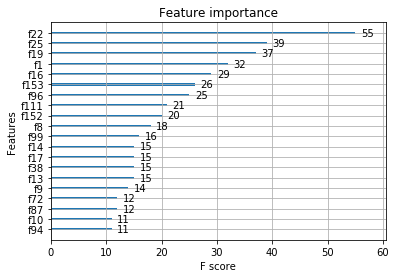

In [89]:
from xgboost import plot_importance

plt.figure(figsize=(20,8))
plot_importance(xgb, max_num_features=20)
plt.show()

In [79]:
pd.set_option('display.max_rows', 500)
pd.Series(X.columns, )

0                                               game_set
1                                          seed_combined
2                                           coach_team_a
3                                           coach_team_b
4                                      conference_team_a
5                                      conference_team_b
6                          steals_in_season_team_a_lag-1
7                          steals_in_season_team_b_lag-1
8                        last_games_won_in_season_team_a
9                  last_games_won_in_season_team_a_lag-1
10                 last_games_won_in_season_team_a_lag-2
11                 last_games_won_in_season_team_a_lag-3
12                       last_games_won_in_season_team_b
13                 last_games_won_in_season_team_b_lag-1
14                 last_games_won_in_season_team_b_lag-2
15                 last_games_won_in_season_team_b_lag-3
16                last_games_won_in_tourney_team_a_lag-1
17                last_games_wo

# Logistic Regression 
## Metric Mean: 0.28 (0.08)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import copy as cp

X = data.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target', 'DayNum'], axis=1)
y = data[['a_win', 'game_set']].astype({'a_win': int})

kf = KFold(n_splits=15, shuffle=True)
metrics = []
all_preds = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i].a_win
    X_t, y_t = X.iloc[t_i], y.iloc[t_i].a_win
    logreg = LogisticRegression(penalty='l2', C=1e5)
    logreg.fit(X_tr.values, y_tr)
    preds = logreg.predict_proba(X_t.values)[:,1]
    ncaa_true = y.iloc[t_i][y.iloc[t_i].game_set == 0]
    ncaa_pred = preds[y.iloc[t_i].reset_index().game_set == 0]
    metric = log_loss(ncaa_true.a_win.astype(int), ncaa_pred)
    print(metric)
    metrics.append(metric)
    all_preds.append(preds)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))


0.182487434467
0.45368776076
0.329247705289
0.331623855584
0.219454570519
0.339576924348
0.307336385386
0.426424924355
0.206691092739
0.234275054654
0.221795115895
0.235765148891
0.200004525425
0.195510751674
0.28058451015
Metric Mean: 0.28 (0.08)


# Random Forst
## Metric Mean: 0.27 (0.02)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import copy as cp

X = data.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target', 'DayNum'], axis=1)
y = data[['a_win', 'game_set']].astype({'a_win': int})

kf = KFold(n_splits=15, shuffle=True)
metrics = []
all_preds = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i].a_win
    X_t, y_t = X.iloc[t_i], y.iloc[t_i].a_win
    logreg = RandomForestClassifier(n_estimators=1000)
    logreg.fit(X_tr.values, y_tr)
    preds = logreg.predict_proba(X_t.values)[:,1]
    ncaa_true = y.iloc[t_i][y.iloc[t_i].game_set == 0]
    ncaa_pred = preds[y.iloc[t_i].reset_index().game_set == 0]
    metric = log_loss(ncaa_true.a_win.astype(int), ncaa_pred)
    print(metric)
    metrics.append(metric)
    all_preds.append(preds)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))


0.328909279054
0.337451228598
0.317141562923
0.315284646799
0.304032439863
0.293502108331
0.326004119257
0.27673798156
0.290367777369
0.336000993773
0.299488554574
0.328105694853
0.318194154933
0.332749190706
0.290664492935
Metric Mean: 0.31 (0.02)


# LightGBM
## Metric Mean: 0.10 (0.09)

In [64]:
from LightGBM import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss


X = data[~data.in_target.astype(bool)].drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1)
y = data[~data.in_target.astype(bool)][['a_win']]
y = y.astype(int)
kf = KFold(n_splits=15, shuffle=True)
metrics = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i]
    X_t, y_t = X.iloc[t_i], y.iloc[t_i]
    lgbm = LGBMClassifier(n_estimators=1000)
    lgbm.fit(X_tr.values, y_tr.values.reshape(-1))
    preds = lgbm.predict_proba(X_t.values)
    metric = log_loss(y_t.values, preds)
    print(metric)
    metrics.append(metric)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))

0.0820151432325
0.173794579293
0.1370408842
0.00121060767342
0.0152927778894
0.206906948704
0.104846143899
0.00549643304168
0.0680749581373
0.258910985447
0.0398149803866
0.253036655242
0.0209004954834
0.106136631732
0.0248142892565
Metric Mean: 0.10 (0.09)


# KNN 
## Metric Mean: 0.62 (0.16)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import copy as cp

X = data.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target', 'DayNum'], axis=1)
y = data[['a_win', 'game_set']].astype({'a_win': int})

kf = KFold(n_splits=15, shuffle=True)
metrics = []
all_preds = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i].a_win
    X_t, y_t = X.iloc[t_i], y.iloc[t_i].a_win
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_tr.values, y_tr)
    preds = knn.predict_proba(X_t.values)[:,1]
    ncaa_true = y.iloc[t_i][y.iloc[t_i].game_set == 0]
    ncaa_pred = preds[y.iloc[t_i].reset_index().game_set == 0]
    metric = log_loss(ncaa_true.a_win.astype(int), ncaa_pred)
    print(metric)
    metrics.append(metric)
    all_preds.append(preds)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))

0.615702753299
0.517991970899
0.595309309475
0.648035996207
0.652316253799
0.52114738574
0.554657817611
0.658748187742
0.583218523689
0.539353691696
0.498481340657
0.497042020665
0.556233513804
0.714233070635
1.1864182294
Metric Mean: 0.62 (0.16)


## Monitoring training performance of XGBoost

In [95]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into X and y
X = data[~data.in_target.astype(bool)].drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1)
y = data[~data.in_target.astype(bool)][['a_win']]
y = y.astype(int)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# fit model no training data
model = XGBClassifier(n_estimators=78)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
eval_set = [(X_train, y_train), (X_test, y_test)]
model = XGBClassifier(n_estimators = 100)
model.fit(X_train, y_train, eval_metric=["error", "logloss"], early_stopping_rounds=10, eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.636194
[1]	validation_0-logloss:0.58736
[2]	validation_0-logloss:0.54807
[3]	validation_0-logloss:0.511481
[4]	validation_0-logloss:0.477483
[5]	validation_0-logloss:0.452353
[6]	validation_0-logloss:0.430786
[7]	validation_0-logloss:0.410174
[8]	validation_0-logloss:0.393767
[9]	validation_0-logloss:0.378021
[10]	validation_0-logloss:0.36211
[11]	validation_0-logloss:0.349707
[12]	validation_0-logloss:0.337438
[13]	validation_0-logloss:0.325909
[14]	validation_0-logloss:0.314917
[15]	validation_0-logloss:0.304624
[16]	validation_0-logloss:0.296315
[17]	validation_0-logloss:0.287383
[18]	validation_0-logloss:0.278035
[19]	validation_0-logloss:0.2703
[20]	validation_0-logloss:0.264316
[21]	validation_0-logloss:0.257979
[22]	validation_0-logloss:0.251442
[23]	validation_0-logloss:0.241298
[24]	validation_0-logloss:0.235212
[25]	validation_0-logloss:0.22836
[26]	validation_0-logloss:0.221203
[27]	validation_0-logloss:0.217779
[28]	validation_0-logloss:0.21292
[2

/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-logloss:0.200021
[32]	validation_0-logloss:0.197198
[33]	validation_0-logloss:0.192852
[34]	validation_0-logloss:0.188286
[35]	validation_0-logloss:0.183933
[36]	validation_0-logloss:0.182129
[37]	validation_0-logloss:0.178408
[38]	validation_0-logloss:0.173929
[39]	validation_0-logloss:0.172198
[40]	validation_0-logloss:0.168149
[41]	validation_0-logloss:0.165191
[42]	validation_0-logloss:0.162091
[43]	validation_0-logloss:0.160217
[44]	validation_0-logloss:0.156913
[45]	validation_0-logloss:0.156333
[46]	validation_0-logloss:0.154943
[47]	validation_0-logloss:0.153042
[48]	validation_0-logloss:0.150448
[49]	validation_0-logloss:0.149059
[50]	validation_0-logloss:0.14694
[51]	validation_0-logloss:0.144997
[52]	validation_0-logloss:0.142386
[53]	validation_0-logloss:0.140795
[54]	validation_0-logloss:0.138653
[55]	validation_0-logloss:0.138029
[56]	validation_0-logloss:0.137297
[57]	validation_0-logloss:0.136578
[58]	validation_0-logloss:0.136436
[59]	validation_0-log

/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.001745	validation_0-logloss:0.125258	validation_1-error:0.055556	validation_1-logloss:0.192852
[34]	validation_0-error:0.001745	validation_0-logloss:0.120571	validation_1-error:0.055556	validation_1-logloss:0.188286
[35]	validation_0-error:0.001745	validation_0-logloss:0.115708	validation_1-error:0.055556	validation_1-logloss:0.183933
[36]	validation_0-error:0.001745	validation_0-logloss:0.111436	validation_1-error:0.055556	validation_1-logloss:0.182129
[37]	validation_0-error:0.001745	validation_0-logloss:0.107183	validation_1-error:0.055556	validation_1-logloss:0.178408
[38]	validation_0-error:0.001745	validation_0-logloss:0.10339	validation_1-error:0.055556	validation_1-logloss:0.173929
[39]	validation_0-error:0.001745	validation_0-logloss:0.09981	validation_1-error:0.055556	validation_1-logloss:0.172198
[40]	validation_0-error:0.001745	validation_0-logloss:0.096379	validation_1-error:0.055556	validation_1-logloss:0.168149
[41]	validation_0-error:0.001745	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[0]	validation_0-error:0.123909	validation_0-logloss:0.634939	validation_1-error:0.138889	validation_1-logloss:0.636194
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.115183	validation_0-logloss:0.586455	validation_1-error:0.111111	validation_1-logloss:0.58736
[2]	validation_0-error:0.125654	validation_0-logloss:0.54376	validation_1-error:0.125	validation_1-logloss:0.54807
[3]	validation_0-error:0.106457	validation_0-logloss:0.503402	validation_1-error:0.104167	validation_1-logloss:0.511481
[4]	validation_0-error:0.104712	validation_0-logloss:0.470504	validation_1-error:0.104167	validation_1-logloss:0.477483
[5]	validation_0-error:0.095986	validation_0-logloss:0.439003	validation_1-error:0.090278	validation_1-logloss:0.452353
[6]	validation_0-error:0.095986	validation_0-logloss:0.41445	validation_1-error:0.090278	validation_1-logloss:0.430786
[7

/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.001745	validation_0-logloss:0.125258	validation_1-error:0.055556	validation_1-logloss:0.192852
[34]	validation_0-error:0.001745	validation_0-logloss:0.120571	validation_1-error:0.055556	validation_1-logloss:0.188286
[35]	validation_0-error:0.001745	validation_0-logloss:0.115708	validation_1-error:0.055556	validation_1-logloss:0.183933
[36]	validation_0-error:0.001745	validation_0-logloss:0.111436	validation_1-error:0.055556	validation_1-logloss:0.182129
[37]	validation_0-error:0.001745	validation_0-logloss:0.107183	validation_1-error:0.055556	validation_1-logloss:0.178408
[38]	validation_0-error:0.001745	validation_0-logloss:0.10339	validation_1-error:0.055556	validation_1-logloss:0.173929
[39]	validation_0-error:0.001745	validation_0-logloss:0.09981	validation_1-error:0.055556	validation_1-logloss:0.172198
[40]	validation_0-error:0.001745	validation_0-logloss:0.096379	validation_1-error:0.055556	validation_1-logloss:0.168149
[41]	validation_0-error:0.001745	v

[105]	validation_0-error:0	validation_0-logloss:0.018706	validation_1-error:0.048611	validation_1-logloss:0.093502
[106]	validation_0-error:0	validation_0-logloss:0.018375	validation_1-error:0.048611	validation_1-logloss:0.092953
[107]	validation_0-error:0	validation_0-logloss:0.018063	validation_1-error:0.048611	validation_1-logloss:0.092785
[108]	validation_0-error:0	validation_0-logloss:0.017764	validation_1-error:0.048611	validation_1-logloss:0.092238
[109]	validation_0-error:0	validation_0-logloss:0.017506	validation_1-error:0.048611	validation_1-logloss:0.091939
[110]	validation_0-error:0	validation_0-logloss:0.017222	validation_1-error:0.048611	validation_1-logloss:0.091524
[111]	validation_0-error:0	validation_0-logloss:0.01694	validation_1-error:0.048611	validation_1-logloss:0.092226
[112]	validation_0-error:0	validation_0-logloss:0.016682	validation_1-error:0.048611	validation_1-logloss:0.092558
[113]	validation_0-error:0	validation_0-logloss:0.016408	validation_1-error:0.048

[177]	validation_0-error:0	validation_0-logloss:0.008273	validation_1-error:0.041667	validation_1-logloss:0.079057
[178]	validation_0-error:0	validation_0-logloss:0.008227	validation_1-error:0.041667	validation_1-logloss:0.078716
[179]	validation_0-error:0	validation_0-logloss:0.008178	validation_1-error:0.041667	validation_1-logloss:0.078493
[180]	validation_0-error:0	validation_0-logloss:0.008127	validation_1-error:0.041667	validation_1-logloss:0.07845
[181]	validation_0-error:0	validation_0-logloss:0.008071	validation_1-error:0.041667	validation_1-logloss:0.078017
[182]	validation_0-error:0	validation_0-logloss:0.008014	validation_1-error:0.041667	validation_1-logloss:0.077729
[183]	validation_0-error:0	validation_0-logloss:0.007965	validation_1-error:0.041667	validation_1-logloss:0.077784
[184]	validation_0-error:0	validation_0-logloss:0.007909	validation_1-error:0.041667	validation_1-logloss:0.077227
[185]	validation_0-error:0	validation_0-logloss:0.00786	validation_1-error:0.0416

[249]	validation_0-error:0	validation_0-logloss:0.005706	validation_1-error:0.041667	validation_1-logloss:0.071726
[250]	validation_0-error:0	validation_0-logloss:0.005684	validation_1-error:0.041667	validation_1-logloss:0.071368
[251]	validation_0-error:0	validation_0-logloss:0.005661	validation_1-error:0.041667	validation_1-logloss:0.071302
[252]	validation_0-error:0	validation_0-logloss:0.00564	validation_1-error:0.041667	validation_1-logloss:0.071034
[253]	validation_0-error:0	validation_0-logloss:0.005627	validation_1-error:0.041667	validation_1-logloss:0.070905
[254]	validation_0-error:0	validation_0-logloss:0.005613	validation_1-error:0.041667	validation_1-logloss:0.070821
[255]	validation_0-error:0	validation_0-logloss:0.005589	validation_1-error:0.041667	validation_1-logloss:0.070558
[256]	validation_0-error:0	validation_0-logloss:0.005565	validation_1-error:0.041667	validation_1-logloss:0.070541
[257]	validation_0-error:0	validation_0-logloss:0.005552	validation_1-error:0.041

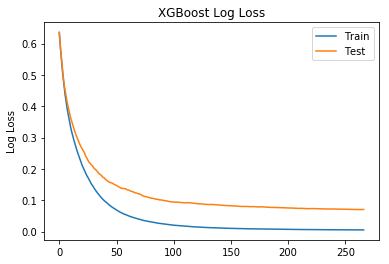

In [89]:
from matplotlib import pyplot

eval_set = [(X_train, y_train), (X_test, y_test)]
model = XGBClassifier(n_estimators = 1000)
model.fit(X_train, y_train, eval_metric=["error", "logloss"], early_stopping_rounds=10, eval_set=eval_set, verbose=True)

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()


In [87]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)

/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Feature ranking:
1. last_games_won_in_year_against_opponent_team_b_lag-1 17 (0.060627)
2. last_games_won_in_year_against_opponent_team_a_lag-1 16 (0.053558)
3. last_games_won_in_tourney_team_a_lag-1 14 (0.032975)
4. last_games_won_in_tourney_team_b_lag-1 15 (0.030393)
5. seed_team_combined 2 (0.025473)
6. DR_game_team_b_lag-3 82 (0.022975)
7. DR_game_team_a_lag-1 41 (0.017416)
8. DR_game_team_a_lag-2 42 (0.017397)
9. DR_game_team_b_lag-1 80 (0.015362)
10. PF_game_team_a_lag-2 57 (0.015193)
11. PF_game_team_a_lag-3 58 (0.015011)
12. PF_game_team_b_lag-3 97 (0.014788)
13. Ast_game_team_b_lag-3 85 (0.013489)
14. PF_game_team_b_lag-2 96 (0.012986)
15. DR_game_team_b_lag-2 81 (0.012699)
16. PF_game_team_a_lag-1 56 (0.012496)
17. PC3_team_a 100 (0.011559)
18. PC2_team_a_lag-1 119 (0.011135)
19. DR_game_team_a_lag-3 43 (0.011117)
20. PF_game_team_b_lag-1 95 (0.010050)
21. PC3_team_a_lag-1 120 (0.009286)
22. games_won_in_tourney_against_opponent_team_b_lag-1 19 (0.008963)
23. games_won_in_tour

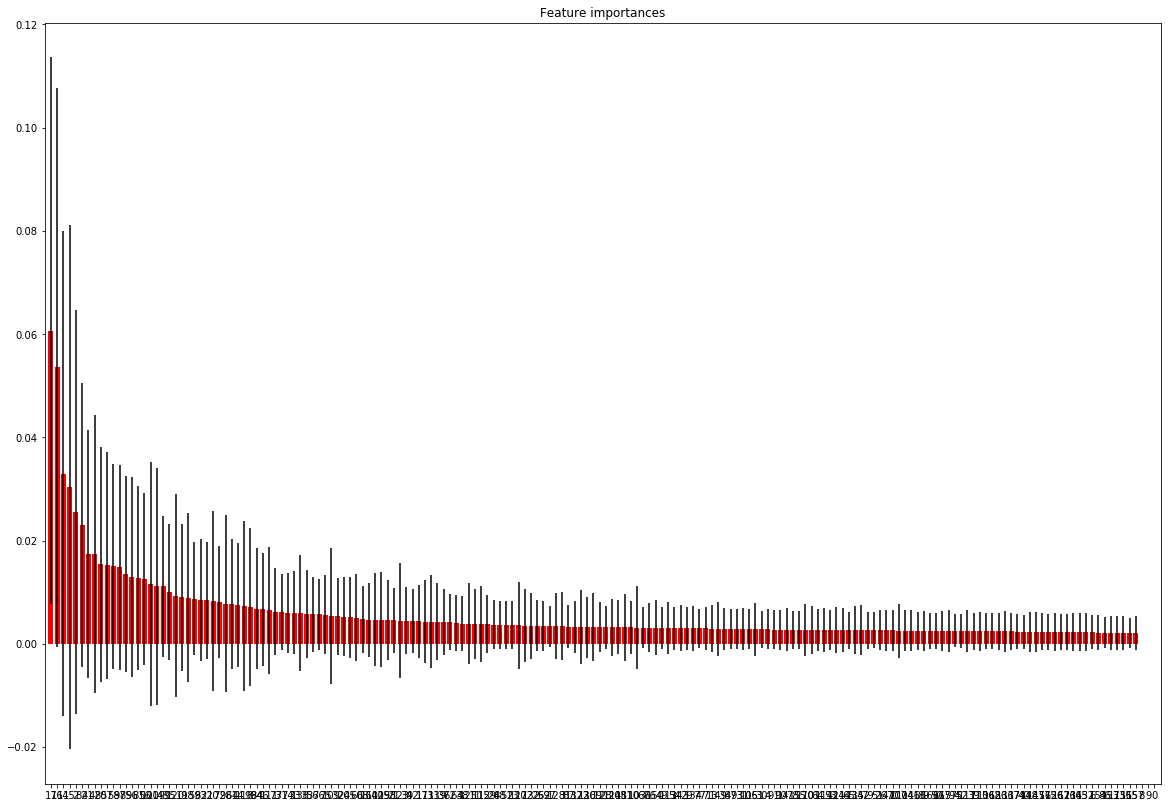

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s %d (%f)" % (f + 1, pd.Series(X.columns)[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,14))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [112]:
# Ensemble

In [121]:
import warnings
warnings.filterwarnings('ignore') #It should be of shape (n_sample, )

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

X = data[~data.in_target.astype(bool)].drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1)
y = data[~data.in_target.astype(bool)][['a_win']]
y = y.astype(int)


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = ExtraTreesClassifier()
clf4 = XGBClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('tree', clf3), ('xgb', clf4)], voting='soft')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['Logistic Regression', 'Random Forest',  'Tree', 'XGB', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='log_loss')
    print("log_loss: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

log_loss: -0.86 (+/- 0.67) [Logistic Regression]
log_loss: -0.48 (+/- 0.13) [Random Forest]
log_loss: -0.32 (+/- 0.02) [Tree]
log_loss: -0.11 (+/- 0.03) [XGB]
log_loss: -0.22 (+/- 0.03) [Ensemble]


In [135]:
data = load_data_template(season=False)
data.dropna(subset=['a_win'], inplace=True)
rank_feat = RankingFeatures(default_lags=0)
# data = rank_feat.per_team_wrapper(data, rank_feat.pca_variables_rankings, per_game=False, per_day=True)
data = rank_feat.per_team_wrapper(data, rank_feat.average_rankings, per_game=False, per_day=True)
print('-- Rankings loaded --')
data.dropna(inplace=True)
print(data.shape)
data.sample()

Empty DataFrame
Columns: []
Index: [(1101, 2014, 9), (1101, 2014, 16), (1101, 2014, 23), (1101, 2014, 30), (1101, 2014, 37), (1101, 2014, 44), (1101, 2014, 51), (1101, 2014, 58), (1101, 2014, 65), (1101, 2014, 72), (1101, 2014, 79), (1101, 2014, 86), (1101, 2014, 93), (1101, 2014, 100), (1101, 2014, 107), (1101, 2014, 114), (1101, 2014, 121), (1101, 2014, 128), (1101, 2014, 133), (1101, 2015, 16), (1101, 2015, 23), (1101, 2015, 30), (1101, 2015, 37), (1101, 2015, 44), (1101, 2015, 51), (1101, 2015, 58), (1101, 2015, 65), (1101, 2015, 72), (1101, 2015, 79), (1101, 2015, 86), (1101, 2015, 93), (1101, 2015, 100), (1101, 2015, 107), (1101, 2015, 114), (1101, 2015, 121), (1101, 2015, 128), (1101, 2015, 133), (1101, 2016, 16), (1101, 2016, 23), (1101, 2016, 30), (1101, 2016, 37), (1101, 2016, 44), (1101, 2016, 51), (1101, 2016, 58), (1101, 2016, 65), (1101, 2016, 72), (1101, 2016, 79), (1101, 2016, 86), (1101, 2016, 93), (1101, 2016, 100), (1101, 2016, 107), (1101, 2016, 114), (1101, 2016, 1

,Season,team_a,team_b,in_target,game_set,a_win,DayNum
2384,2015,1112,1326,True,0,True,138


In [ ]:
X_sub = data[data.in_target.astype(bool)].drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1)
y_sub = data[data.in_target.astype(bool)][['Season', 'team_a', 'team_b', 'a_win', 'in_target']]

xgb = XGBClassifier()
xgb.fit(X.values, y.values.reshape(-1))
preds = xgb.predict_proba(X_sub.values)

sub = cp.deepcopy(y_sub)
sub['Pred'] = preds[:,1]
sub['ID'] = sub['Season'].map(str) + '_' + sub['team_a'].map(str) + '_' + sub['team_b'].map(str)
sub.set_index('ID', inplace=True)
sub.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1, inplace=True)
sub.head()

In [169]:
df = pd.read_csv('data/SampleSubmissionStage2_SampleTourney2018.csv')
df.head()

,ID,Pred
0,2018_1104_1112,0.5
1,2018_1104_1113,0.5
2,2018_1104_1116,0.5
3,2018_1104_1120,0.5
4,2018_1104_1124,0.5


In [170]:
df['Season'] = df['ID'].apply(lambda s: s[:4])
df['team_a'] = df['ID'].apply(lambda s: s[5:9])
df['team_b'] = df['ID'].apply(lambda s: s[10:13])
df['in_target'] = True
df['game_set'] = 0
df['a_win'] = False

data = df.drop(['ID','Pred'],axis=1)

In [171]:
data.head()

,Season,team_a,team_b,in_target,game_set,a_win
0,2018,1104,111,True,0,False
1,2018,1104,111,True,0,False
2,2018,1104,111,True,0,False
3,2018,1104,112,True,0,False
4,2018,1104,112,True,0,False


In [174]:
seed_feat = SeedFeatures(default_lags=1)
data = seed_feat.per_team_wrapper(data, seed_feat.team_seeds, per_game=False, per_day=False, combine='subtract')
print('-- Seeds loaded --')
coach_feat = CoachFeatures(default_lags=0)
data = coach_feat.per_team_wrapper(data, coach_feat.coach_func, per_game=False, per_day=False)
print('-- Coach loaded --')
conf_feat = ConferenceFeatures(default_lags=0)
data = conf_feat.per_team_wrapper(data, conf_feat.conference_games, per_game=False, per_day=False)
print('-- Conferences loaded --')
event_feat = EventFeatures(default_lags=1)
data = event_feat.per_team_wrapper(data, event_feat.steals_in_season, fillna=0)
print('-- Events loaded --')
game_feat = GameFeatures(default_lags=1)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_season, fillna=0)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_tourney, fillna=0)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_against_opponent, fillna=0, per_game=True)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney_against_opponent, fillna=0, per_game=True)
print('-- Game Features loaded --')
game_detail_feat = GameDetailedFeatures(default_lags=3)
#data = game_detail_feat.per_team_wrapper(data, game_detail_feat.detail_features_by_game, per_day=False)
print('-- Game Detailed Features loaded --')
rank_feat = RankingFeatures(default_lags=1)
data = rank_feat.per_team_wrapper(data, rank_feat.pca_variables_rankings, per_game=False, per_day=False)
print('-- Rankings loaded --')
data.dropna(inplace=True)
print(data.shape)
data.sample()

-- Seeds loaded --
-- Coach loaded --
-- Conferences loaded --
-- Events loaded --
-- Game Features loaded --
-- Game Detailed Features loaded --


ValueError: len(left_on) must equal the number of levels in the index of "right"